In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import defaultdict

Loaded in the imports, and now to load in the dataset.

In [5]:
main_df = pd.read_csv('./globalterrorismdb_0617dist.csv',encoding='ISO-8859-1', usecols=[0,1,2,3,7,8,28,29,39,40,41])
main_df.head()

,eventid,iyear,imonth,iday,country,country_txt,attacktype1,attacktype1_txt,target1,natlty1,natlty1_txt
0,197000000001,1970,7,2,58,Dominican Republic,1,Assassination,Julio Guzman,58.0,Dominican Republic
1,197000000002,1970,0,0,130,Mexico,6,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",21.0,Belgium
2,197001000001,1970,1,0,160,Philippines,1,Assassination,Employee,217.0,United States
3,197001000002,1970,1,0,78,Greece,3,Bombing/Explosion,U.S. Embassy,217.0,United States
4,197001000003,1970,1,0,101,Japan,7,Facility/Infrastructure Attack,U.S. Consulate,217.0,United States


In [6]:
count = [0] * 9
for _, event in main_df.iterrows():
    if event['attacktype1'] == 1:
        count[0] += 1
    if event['attacktype1'] == 2:
        count[1] += 1
    if event['attacktype1'] == 3:
        count[2] += 1
    if event['attacktype1'] == 4:
        count[3] += 1
    if event['attacktype1'] == 5:
        count[4] += 1
    if event['attacktype1'] == 6:
        count[5] += 1
    if event['attacktype1'] == 7:
        count[6] += 1
    if event['attacktype1'] == 8:
        count[7] += 1
    if event['attacktype1'] == 9:
        count[8] += 1

print(count)



[18402, 40223, 83073, 598, 902, 10233, 9581, 913, 6425]


In [14]:
attack_year_type = []
attack_types = []
year_type_counter = defaultdict(lambda: defaultdict(int))
for _, event in main_df.iterrows():
    attack_year_type.append((event['iyear'], event['attacktype1_txt']))
    year_type_counter[int(event['iyear'])][event['attacktype1_txt']] += 1
    if event['attacktype1_txt'] not in attack_types:
        attack_types.append(event['attacktype1_txt']) 

Finding the amount of bombing/explosion terrorist events in the years 1970 to 2016. There seems to be a large uptick in the years following 2000-2001. After further exploration, it is hard to conclude that the increase in explosion events is in anyway correlated to the price of common explosives.

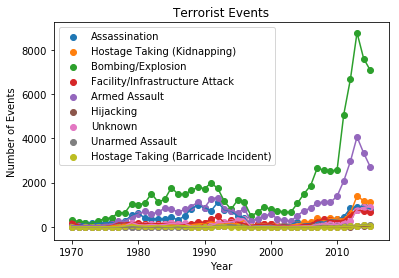

In [15]:
def plot_attack(attack_type):
    x = np.arange(1970,2016)
    y = []
    
    for year in year_type_counter:
        y.append(year_type_counter[year][attack_type])
        
    plt.scatter(x, y, label=attack_type)
    plt.plot(x,y)

for attack_type in attack_types:
    plot_attack(attack_type)
plt.ylabel('Number of Events')
plt.xlabel('Year')
plt.title('Terrorist Events')
plt.legend(loc='upper left');
plt.show()